In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
svm = pd.read_csv('it_ls_svm_all_features.csv')
bagging = pd.read_csv('ordered_predictions_bagging_svm_15_all_features.csv')

In [3]:
svm = svm.filter(items=['compound_name'],axis=1)

In [4]:
svm['rank_svm'] = svm.index

In [5]:
bagging = bagging.drop(['score_bagging'],axis=1)
#bagging : compound_name
#svm : 

In [6]:
list_svm = list(svm['compound_name'])
list_bagging = list(bagging['compound_name'])

In [7]:
list_common = []
common = 0
for i in list_svm:
    if i in list_bagging:
        list_common.append(i)

In [8]:
list_common

[]

In [25]:
max_calculated = pd.read_csv('max_calculated.csv')
max_calculated = max_calculated.set_index('prettyformula',drop=True)

In [26]:
max_bagg = max_calculated.filter(items=list_bagging,axis=0)
max_it = max_calculated.filter(items=list_svm,axis=0)

In [27]:
max_bagg = max_bagg.filter(['dH','dEf'],axis=1)
max_it = max_it.filter(['dH','dEf'],axis=1)

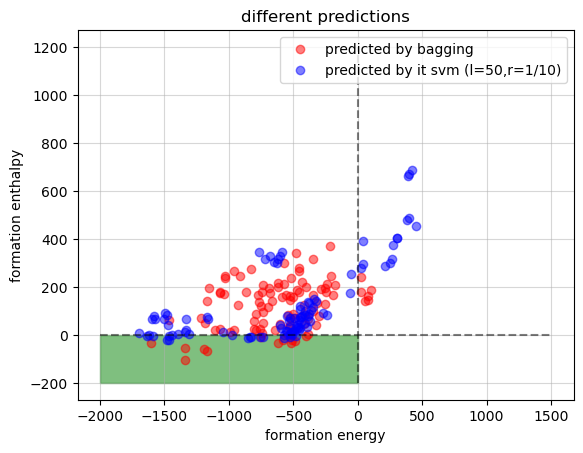

In [32]:
fig, ax = plt.subplots()
ax.plot(max_bagg['dEf'].to_numpy(),max_bagg['dH'].to_numpy(), 'o',
       alpha=0.5,color='red',label='predicted by bagging')
ax.plot(max_it['dEf'].to_numpy(),max_it['dH'].to_numpy(), 'o',
       alpha=0.5,color='blue',label='predicted by it svm (l=50,r=1/10)')
ax.fill_between(np.linspace(-2000,0,2,endpoint=True),
                y1=-200,y2=0,color='green',alpha=0.5)
ax.plot(np.linspace(-2000,1500,2,endpoint=True),np.zeros(2),'--k',alpha=0.5)
ax.plot(np.zeros(2),np.linspace(-200,1200,2,endpoint=True),'--k',alpha=0.5)
ax.grid(alpha=0.5)
ax.set_xlabel(xlabel='formation energy')
ax.set_ylabel(ylabel='formation enthalpy')
ax.set_title('different predictions')
plt.legend()      
plt.savefig('diff_pred_50_10.png')